## Figure S9-S10. Pre-/co-eruptive deformation of the 2011 & 2017 Shinmoe-dake eruption

In [1]:
%matplotlib inline
import os
from cartopy import crs as ccrs
from matplotlib import pyplot as plt
from mintpy import view
plt.rcParams.update({'font.size': 12})

work_dir = os.path.expanduser('~/Papers/2021_Kirishima/figs_src/obs')
os.chdir(work_dir)
print('Go to directory:', work_dir)

Go to directory: /Users/yunjunz/Papers/2021_Kirishima/figs_src/obs


In [2]:
def plot_asc_desc_maps(fnames, titles, dem_opt, out_fig, figsize=[9, 4]):
    # options for view.py
    opt = dem_opt
    opt += ' -c jet -v -5 5 -u cm --noverbose '
    opt += ' --notitle --fontsize 12 --ref-size 3 --nocbar --alpha 0.9 '
    opt += ' --lalo-step 0.2 '
    #opt += ' --scalebar 0.2 0.13 0.04 --scalebar-pad 0.05 --noverbose '

    # plot
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=figsize, subplot_kw=dict(projection=ccrs.PlateCarree()))
    axs = axs.flatten()

    # plot asc track
    ax = axs[0]
    cmd = 'view.py {f} phase {o} --lalo-loc 1 0 0 1 '.format(f=fnames[0], o=opt)
    data, atr, inps = view.prep_slice(cmd)
    ax, inps, im, cbar = view.plot_slice(ax, data, atr, inps)
    ax.set_title('asc track\n'+titles[0])

    # plot desc track
    ax = axs[1]
    cmd = 'view.py {f} phase {o} --lalo-loc 0 0 0 1 '.format(f=fnames[1], o=opt)
    data, atr, inps = view.prep_slice(cmd)
    ax, inps, im, cbar = view.plot_slice(ax, data, atr, inps)
    ax.set_title('desc track\n'+titles[1])

    # axis format
    fig.tight_layout()
    #plt.annotate('ALOS-1\nasc 424', xy=(0.9, 0.70), xycoords='figure fraction')
    #plt.annotate('ALOS-1\ndesc 73', xy=(0.9, 0.20), xycoords='figure fraction')

    # colorbar
    cax = fig.add_axes([1.0, 0.3, 0.015, 0.4])
    cbar = plt.colorbar(im, cax=cax, orientation='vertical', ticks=[-5, 0, 5])
    cbar.ax.tick_params(labelsize=12)
    cbar.set_label('Line-of-Sight\ndisplacement [cm]', fontsize=12)

    # output
    if out_fig:
        plt.savefig(out_fig, bbox_inches='tight', transparent=True, dpi=600)
        print('save figure to file', out_fig)
    plt.show()

### 2011 Shinmoe-dake eruption: pre-eruptive inflation

save figure to file /Users/yunjunz/Papers/2021_Kirishima/figs_src/obs/Shinmoe2011Pre.png


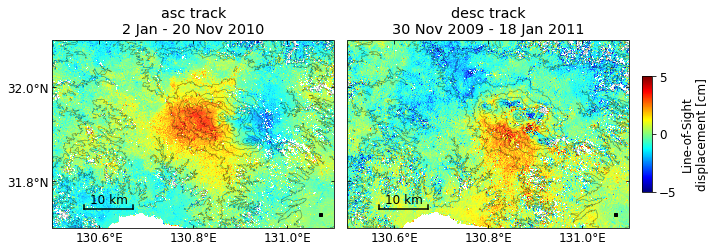

In [3]:
# input files
data_dir = os.path.expanduser('~/Papers/2021_Kirishima/figs_src/data/2011ShinmoeEruption')
dem_file = os.path.join(data_dir, 'gsi30m.dem.wgs84')
dem_opt =  ' --dem {} --dem-noshade --contour-step 200 --contour-smooth 1.0 '.format(dem_file)

fname1 = os.path.join(data_dir, 'AlosAT424_20100102_20101120.unw')
fname2 = os.path.join(data_dir, 'AlosDT73_20091130_20110118.unw')
titles = ['2 Jan - 20 Nov 2010', '30 Nov 2009 - 18 Jan 2011']
out_fig = os.path.join(work_dir, 'Shinmoe2011Pre.png')

plot_asc_desc_maps(fnames=[fname1, fname2], titles=titles, dem_opt=dem_opt, out_fig=out_fig)

### 2011 Shinmoe-dake eruption: co-eruptive deflation + ash/tephra deposit

save figure to file /Users/yunjunz/Papers/2021_Kirishima/figs_src/obs/Shinmoe2011Co.png


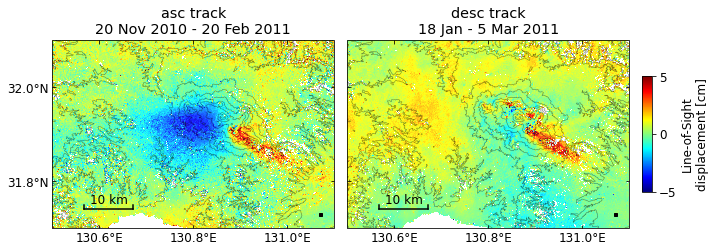

In [4]:
# input files
data_dir = os.path.expanduser('~/Papers/2021_Kirishima/figs_src/data/2011ShinmoeEruption')
dem_file = os.path.join(data_dir, 'gsi30m.dem.wgs84')
dem_opt =  ' --dem {} --dem-noshade --contour-step 200 --contour-smooth 1.0 '.format(dem_file)

fname1 = os.path.join(data_dir, 'AlosAT424_20101120_20110220.unw')
fname2 = os.path.join(data_dir, 'AlosDT73_20110118_20110305.unw')
titles = ['20 Nov 2010 - 20 Feb 2011', '18 Jan - 5 Mar 2011']
out_fig = os.path.join(work_dir, 'Shinmoe2011Co.png')

plot_asc_desc_maps(fnames=[fname1, fname2], titles=titles, dem_opt=dem_opt, out_fig=out_fig)

### 2017 Shinmoe-dake eruption: ash/tephra deposit

save figure to file /Users/yunjunz/Papers/2021_Kirishima/figs_src/obs/Shinmoe2017Co.png


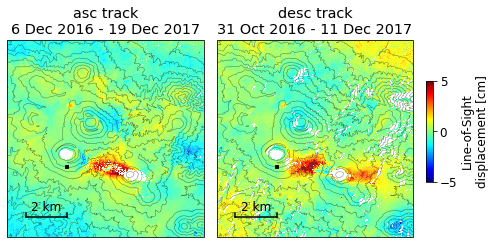

In [5]:
# input files
data_dir = os.path.expanduser('~/Papers/2021_Kirishima/figs_src/data/2017ShinmoeEruption')
dem_file = os.path.join(data_dir, 'gsi10m.dem.wgs84')
dem_opt =  ' --dem {} --dem-noshade --contour-step 100 --contour-smooth 0.0 --shade-az 45 '.format(dem_file)

fname1 = os.path.join(data_dir, 'Alos2AT131_20161206_20171219.unw')
fname2 = os.path.join(data_dir, 'Alos2DT23_20161031_20171211.unw')
titles = ['6 Dec 2016 - 19 Dec 2017', '31 Oct 2016 - 11 Dec 2017']
out_fig = os.path.join(work_dir, 'Shinmoe2017Co.png')

plot_asc_desc_maps(fnames=[fname1, fname2], titles=titles, dem_opt=dem_opt, out_fig=out_fig, figsize=[6, 3.5])